<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Antonio Jorge (DC) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Antonio Jorge do partido CD, do qual pode ser visualizado clicando <a href="https://divulgacandcontas.tse.jus.br/candidaturas/oficial/2022/BR/SP/546/candidatos/917705/5_1660434590903.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = '../PlanosPDF/PLANODC.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'Producer': 'Nitro PDF PrimoPDF',
 'CreationDate': "D:20220811190727+03'00'",
 'ModDate': "D:20220811190727+03'00'",
 'Title': 'Microsoft Word - BRASIL 27 2022 _1_',
 'Creator': 'PrimoPDF http://www.primopdf.com',
 'Author': 'Marcelo'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

9

In [7]:
# Página 1
pdf.pages[0].extract_text()

' \n \nELEIÇÃO 2022 – PRESIDÊNCIA DA REPÚBLICA \n \nDEMOCRACIA CRISTÃ – DC \n \nCARTA 27 \n \n \nDIRETRIZES GERAIS DE GOVERNO PARA \nCONSTRUIR UM NOVO E MELHOR BRASIL \n \n \n \nCUMPRIR E FAZER CUMPRIR A CONSTITUIÇÃO \n \n1. Cumprir e fazer cumprir a Constituição. A força das grandes Nações está no respeito \na Constituição. A Constituição é a alma dos povos. \n \n \nCOMPROMISSO COM A FAMÍLIA \n \n2. O resgate e a proteção dos valores éticos da Família e a satisfação plena de suas \nnecessidades  serão  o  fundamento,  a  inspiração  e  o  objetivo  permanente  da \nDemocracia Cristã, no exercício da Presidência da República. \n \n \nPROGRAMA DE METAS SOCIAIS \n \n3. Formulação e aplicação de PROGRAMA DE METAS SOCIAIS orientado para a \nsatisfação das demandas sociais, a inclusão social e a igualdade de oportunidades \ncom sistema de indicadores para mensurar o desempenho governamental e o grau \nda satisfação da população, em relação às Metas Sociais. \n \n \nPOLÍTICA ORIENTADA PARA O

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

 
 
 
DIREITO A IGUALDADE DE OPORTUNIDADE 
 
11. Promover  a  igualdade  de  oportunidade  entre  todos,  o  que  pressupõe  a 
igualdade  de  direito  a  EDUCAÇÃO,  SAÚDE,  TRABALHO,  SEGURANÇA  E 
JUSTIÇA,  tornando  assim  possível  a  construção  do  modelo  de  Sociedade 
proposto pela Democracia Cristã e incluído no inciso I, artigo 3º da Constituição 
Federal: 
 
    “Uma Sociedade Livre, Justa e Solidária”. 
 
 
DIREITO SOCIAL À MORADIA 
 
 
12. Promover  esforços  para  assegurar  a  todas  as  famílias  a  MORADIA  digna, 
mediante  políticas  públicas  específicas,  promovendo  ainda  a  ampliação  e 
aprimoramento dos programas governamentais existentes e o respeito à função 
social da moradia. 
 
Ter  como  Política  de  Estado,  assegurar  moradia  para  a  população 
economicamente  carente.  A  ausência  de  renda  não  pode  representar  a            
ausência de moradia. 
 
 
LAZER NA VIDA DE TODOS 
 
 
13. Assegurar a todos, mediante políticas públicas específicas o 

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

 
 
E


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

 
 
eleição 2022 – presidência da república 
 
democracia cristã – dc 
 
carta 27 
 
 
diretrizes gerais de governo para 
construir um novo e melhor brasil 
 
 
 
cumprir e fazer cumprir a constituição 
 
1. cumprir e fazer cumprir a constituição. a força das grandes nações está no respeito 
a constituição. a constituição é a alma dos povos. 
 
 
compromisso com a família 
 
2. o resgate e a proteção dos valores éticos da família e a satisfação plena de suas 
necessidades  serão  o  fundamento,  a  inspiração  e  o  objetivo  permanente  da 
democracia cristã, no exercício da presidência da república. 
 
 
programa de metas sociais 
 
3. formulação e aplicação de programa de metas sociais orientado para a 
satisfação das demandas sociais, a inclusão social e a igualdade de oportunidades 
com sistema de indicadores para mensurar o desempenho governamental e o grau 
da satisfação da população, em relação às metas sociais. 
 
 
política orientada para o desenvolvimento  
 
4. formulação  

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

 
 
eleição 2022   presidência da república 
 
democracia cristã   dc 
 
carta 27 
 
 
diretrizes gerais de governo para 
construir um novo e melhor brasil 
 
 
 
cumprir e fazer cumprir a constituição 
 
1  cumprir e fazer cumprir a constituição  a força das grandes nações está no respeito 
a constituição  a constituição é a alma dos povos  
 
 
compromisso com a família 
 
2  o resgate e a proteção dos valores éticos da família e a satisfação plena de suas 
necessidades  serão  o  fundamento   a  inspiração  e  o  objetivo  permanente  da 
democracia cristã  no exercício da presidência da república  
 
 
programa de metas sociais 
 
3  formulação e aplicação de programa de metas sociais orientado para a 
satisfação das demandas sociais  a inclusão social e a igualdade de oportunidades 
com sistema de indicadores para mensurar o desempenho governamental e o grau 
da satisfação da população  em relação às metas sociais  
 
 
política orientada para o desenvolvimento  
 
4  formulação  

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['eleição', '2022', 'presidência', 'da', 'república']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['eleição', '2022', 'presidência', 'república', 'democracia']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('federal', 18),
 ('nacional', 12),
 ('política', 11),
 ('desenvolvimento', 11),
 ('ações', 11),
 ('governo', 10),
 ('assegurar', 10),
 ('social', 9),
 ('políticas', 9),
 ('público', 9),
 ('segurança', 8),
 ('pública', 8),
 ('saúde', 8),
 ('todos', 8),
 ('educação', 8),
 ('democracia', 7),
 ('cristã', 7),
 ('constituição', 7),
 ('sistema', 7),
 ('apoio', 7),
 ('sociedade', 7),
 ('fazer', 6),
 ('através', 6),
 ('públicas', 6),
 ('promover', 6),
 ('todas', 6),
 ('país', 6),
 ('ensino', 6),
 ('serviço', 6),
 ('direito', 6)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,federal,18
1,nacional,12
2,política,11
3,desenvolvimento,11
4,ações,11


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

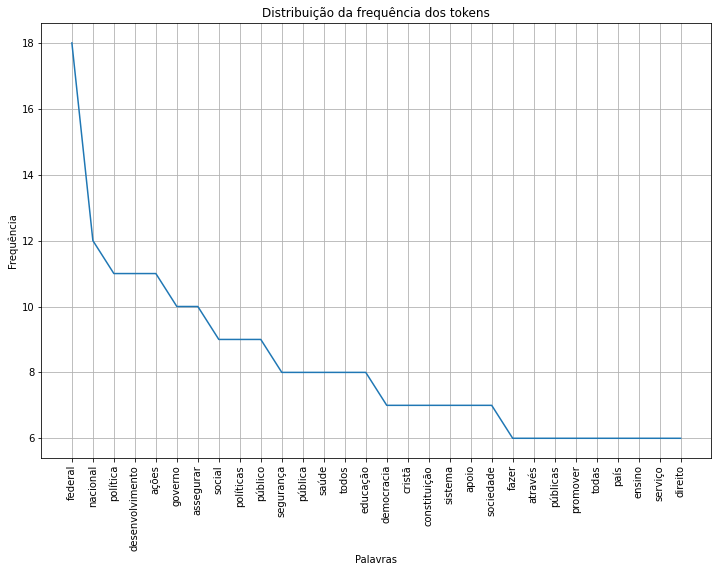

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

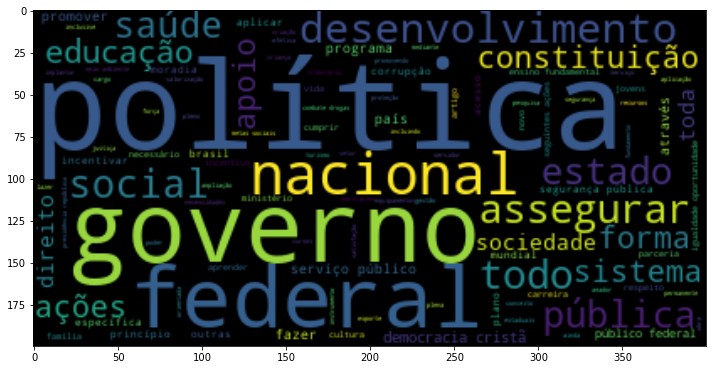

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022